<a href="https://colab.research.google.com/github/Likitha-Thirumalasetty/Energy-Consumption-Forecasting/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Performing customer segemenatation to identify popular customer groups**

In [23]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [25]:
# loading the dataset
df = pd.read_csv('/content/BankChurners.csv')

Performing Exploratory Data Analysis (EDA)

In [26]:
# Printing the first five datapoints of the dataset
print(df.head())

   CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1       

In [27]:
# Performing descriptive analysis
print(df.describe())

          CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
count  1.012700e+04  10127.000000     10127.000000    10127.000000   
mean   7.391776e+08     46.325960         2.346203       35.928409   
std    3.690378e+07      8.016814         1.298908        7.986416   
min    7.080821e+08     26.000000         0.000000       13.000000   
25%    7.130368e+08     41.000000         1.000000       31.000000   
50%    7.179264e+08     46.000000         2.000000       36.000000   
75%    7.731435e+08     52.000000         3.000000       40.000000   
max    8.283431e+08     73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%            

In [28]:
# Obtaining the different data types present in the dataset
print(df.dtypes)

CLIENTNUM                                                                                                                               int64
Attrition_Flag                                                                                                                         object
Customer_Age                                                                                                                            int64
Gender                                                                                                                                 object
Dependent_count                                                                                                                         int64
Education_Level                                                                                                                        object
Marital_Status                                                                                                                         object
Income

In [29]:
# Obtaining the shape of the dataset
print(df.shape)

(10127, 23)


In [30]:
# Checking for null values in the dataset
print(df.isnull().sum())  # sum to count null values

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

Feature Engineering and Clustering Algorithm

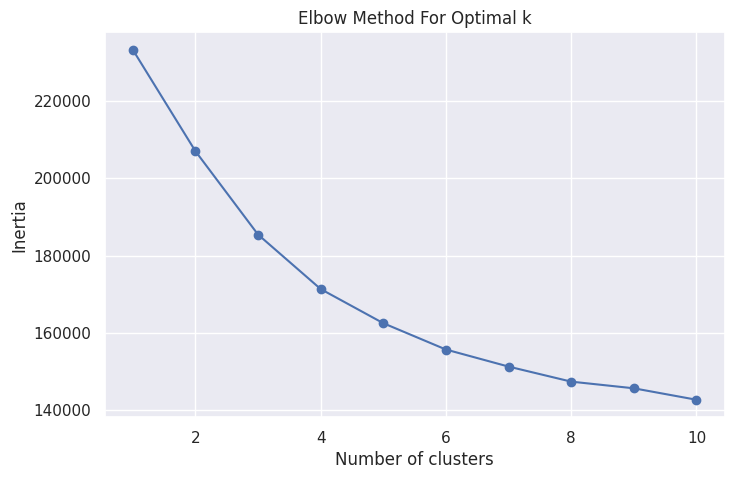

   CLIENTNUM  Cluster
0  768805383        0
1  818770008        0
2  713982108        0
3  769911858        0
4  709106358        1


In [50]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset (assuming it's already loaded as 'df')
# df = pd.read_csv('your_dataset.csv')  # Uncomment if loading from CSV

# Step 1: Feature selection
categorical_cols = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
numerical_cols = [
    'Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count',
    'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
    'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
    'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
]

# Label encoding for categorical columns
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Step 2: Scaling numerical columns
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Define the features to be used for clustering (exclude 'CLIENTNUM' or any unique identifier)
features = categorical_cols + numerical_cols

# Step 3: Determine the optimal number of clusters (Elbow Method)
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[features])  # Use selected features for clustering
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

# Step 4: Apply KMeans with the chosen number of clusters (set after visualizing the elbow graph)
optimal_k = 3  # Adjust based on elbow method plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[features])

# Step 5: Analyze clustering results
print(df[['CLIENTNUM', 'Cluster']].head())  # Display cluster assignment

# Step 6: Optionally save the dataframe with cluster assignments
df.to_csv('clustered_data.csv', index=False)

In [51]:
df1 = pd.read_csv('/content/clustered_data.csv')

In [52]:
df1

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2,Cluster
0,768805383,1,-0.165406,1,0.503368,3,1,2,0,0.384621,...,-0.473422,0.488971,2.623494,-0.959707,-0.973895,3.834003,-0.775882,-0.437754,0.437763,0
1,818770008,1,0.333570,0,2.043199,2,2,4,0,1.010715,...,-0.366667,-0.008486,3.563293,-0.916433,-1.357340,12.608573,-0.616276,-0.437854,0.437845,0
2,713982108,1,0.583058,1,0.503368,2,1,3,0,0.008965,...,-1.426858,-0.445658,8.367214,-0.740982,-1.911206,6.807864,-0.997155,-0.437952,0.437955,0
3,769911858,1,-0.789126,0,1.273283,3,3,4,0,-0.241473,...,1.661686,-0.734100,2.942843,-0.951758,-1.911206,6.807864,1.759686,-0.437644,0.437654,0
4,709106358,1,-0.789126,1,0.503368,5,1,2,0,-1.869317,...,-1.426858,-0.302868,6.455682,-1.056263,-1.570365,7.509325,-0.997155,-0.437950,0.437955,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,1,0.458314,1,-0.266547,2,2,1,0,0.509840,...,0.844455,-0.584929,-0.259771,3.259358,2.221481,0.608119,0.678714,-0.437486,0.437489,0
10123,710638233,0,-0.664382,1,-0.266547,6,0,1,0,-1.368442,...,1.255524,-0.591639,0.201004,1.283475,0.176440,-0.122745,0.856458,2.286645,-2.286648,2
10124,716506083,0,-0.290150,0,-1.036462,3,1,4,0,0.008965,...,-1.426858,-0.226632,0.269436,1.732994,-0.207005,0.444305,-0.997155,2.293790,-2.293795,2
10125,717406983,0,-2.036565,1,-0.266547,2,3,1,0,0.008965,...,-1.426858,-0.240713,-1.026208,1.174848,-0.121795,0.041070,-0.997155,2.290587,-2.290577,2


Visualisation

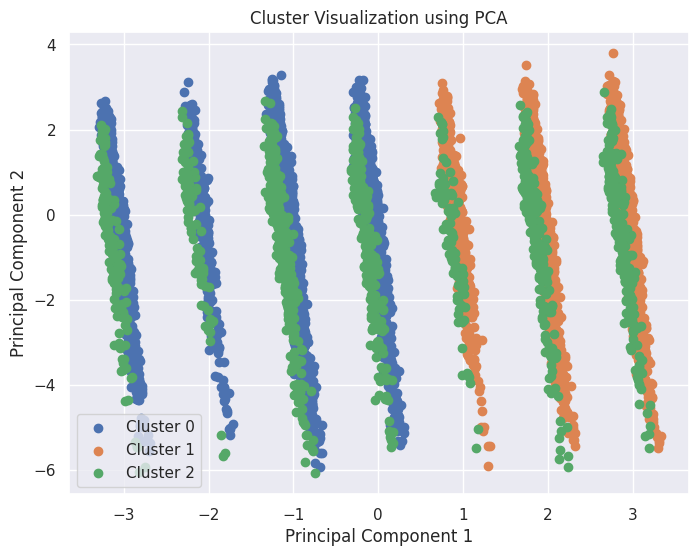

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans

# Step 1: (Assuming the previous steps for feature engineering, encoding, and scaling are done)
# Define the features to be used for clustering
features = categorical_cols + numerical_cols

# Step 2: Apply PCA to reduce dimensionality for visualization
pca = PCA(n_components=2)  # Reducing to 2 components for visualization
df_pca = pca.fit_transform(df[features])

# Step 3: Create a DataFrame for PCA components and Cluster assignments
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = df['Cluster']

# Step 4: Visualize the clusters using a scatter plot
plt.figure(figsize=(8, 6))
for cluster in df_pca['Cluster'].unique():
    cluster_data = df_pca[df_pca['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}')

plt.title('Cluster Visualization using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()